## Visualizatie data
Dit notebook is gemaakt om het proces van geexploreerde data tot visualisatie inzichtelijk te maken.
Er wordt gebruikgemaakt van functies die al in data-exploratie beschreven zijn daarom worden deze geimporteerd via de volgende imports naast andere vereiste libaries

In [10]:
from genlib import get_csv, save_csv, print_dataframe
from lib import get_unique_values, get_unique_codes
import pandas as pd
import matplotlib.pyplot as plt


Met onderstaande functie is het mogelijk om data te visualiseren met pie-charts

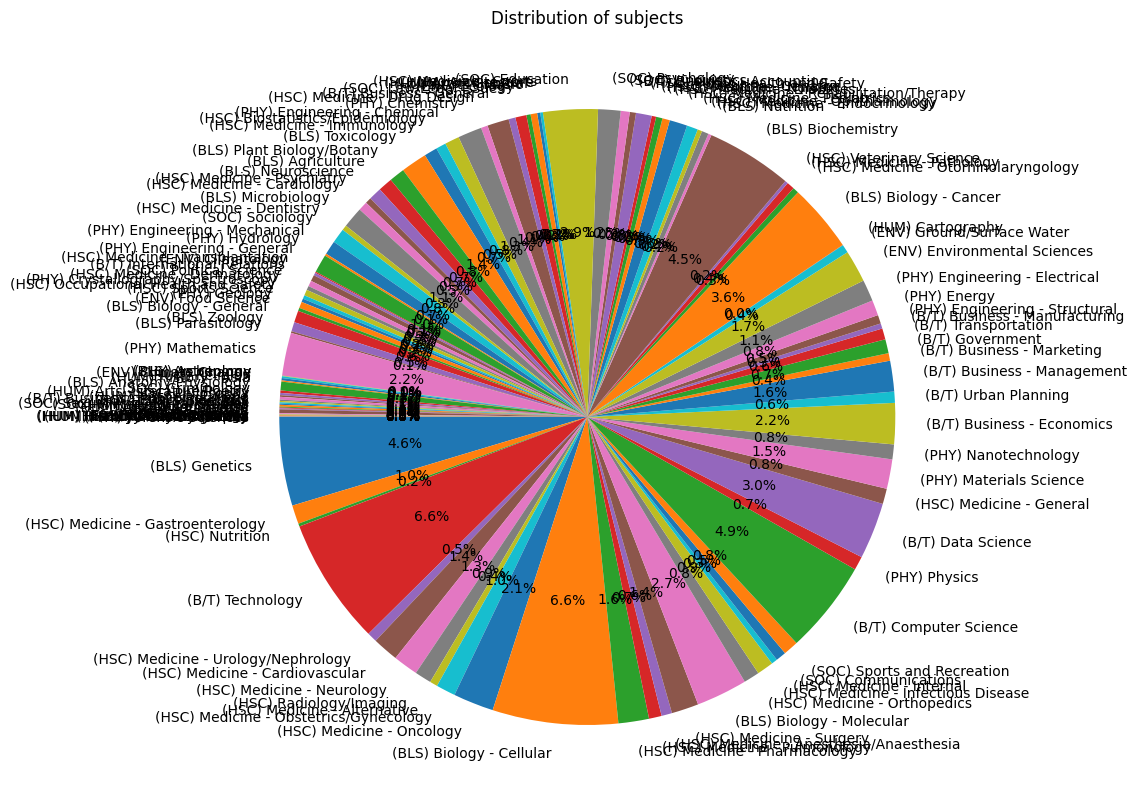

In [11]:
def visualize(df, title, index, count, path=""):
	df.set_index(index, inplace=True)
	df.sort_values(by=count, ascending=True)
	plt.figure(figsize=(10, 10))
	df[count].plot.pie(
		autopct="%1.1f%%",      # show percentages
		startangle=180,         # rotate start angle
		ylabel="",              # remove y-axis label
		legend=False
	)
	plt.title(title)

	if path != "":
		plt.savefig(path, bbox_inches='tight')
	else:
		plt.show()

df = get_csv('data/source.csv', 'Record ID', ['Record ID', "Subject", 'OriginalPaperDate' ])
data = get_unique_values(df, "Subject")
visualize(data, "Distribution of subjects", "Subject", 'count')

Omdat dit toch een overload aan informatie is heb ik een functie gemaakt die de waarden sorteerd op groote en die categorien onder een bepaalde grenswaarde samenvoegd tot de other categorie dit levert dan de onderstaande code op.

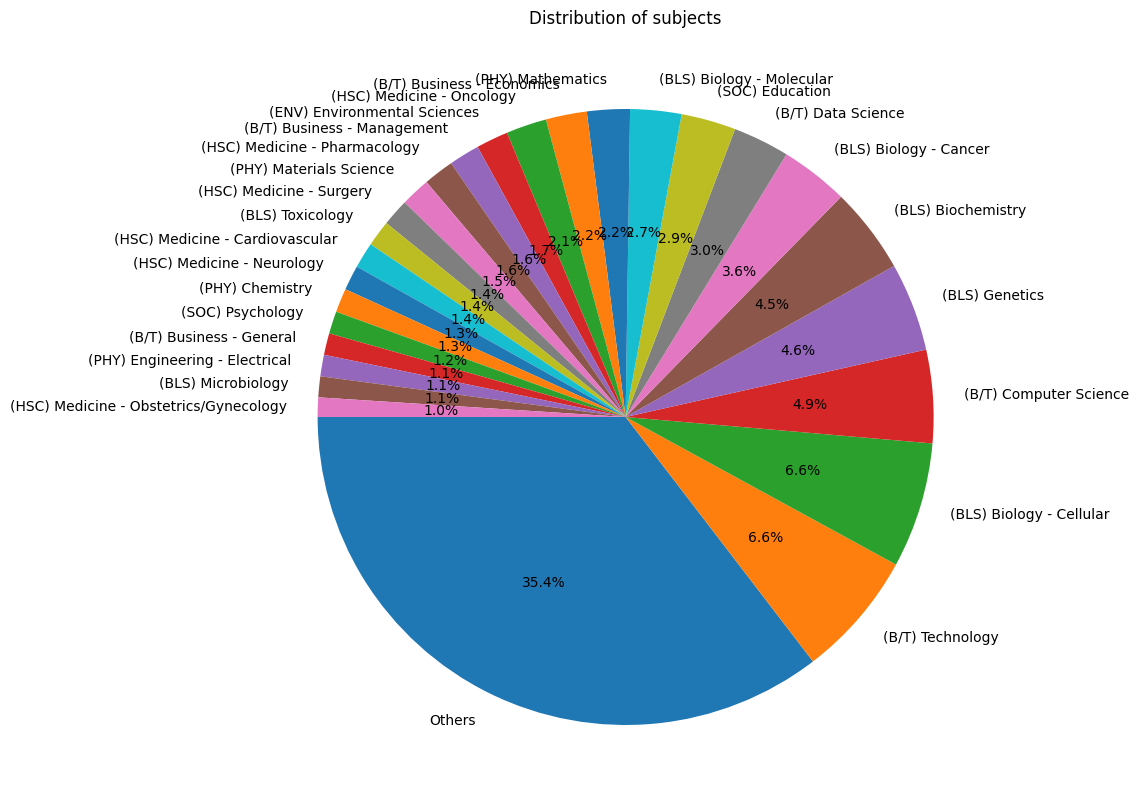

In [12]:
def combine_into_others(df, split_percentage, index):
	total = df["count"].sum()

	# Calculate percentage
	df["percent"] = df["count"] / total * 100

	# Split into two groups: >=1% and <1%
	main_df = df[df["percent"] >= split_percentage].copy()
	others_df = df[df["percent"] < split_percentage].copy()

	# Combine the small ones into a single "Others" row
	others_sum = others_df["count"].sum()
	if others_sum > 0:
		main_df = pd.concat([
			main_df,
			pd.DataFrame({index: ["Others"], "count": [others_sum]})
		], ignore_index=True)

	# Sort again if needed
	return main_df.sort_values(by="count", ascending=False).reset_index(drop=True)

df = get_csv('data/source.csv', 'Record ID', ['Record ID', "Subject", 'OriginalPaperDate' ])
data = get_unique_values(df, "Subject")
data = combine_into_others(data, 1, "Subject")
visualize(data, "Distribution of subjects", "Subject", 'count')

Hierna heb ik 2 diagrammen gemaakt ter vergelijking eerst een diagram met de onderzoeksonderwerpen in 2022 en daarna buiten 2022 zie de code hieronder.

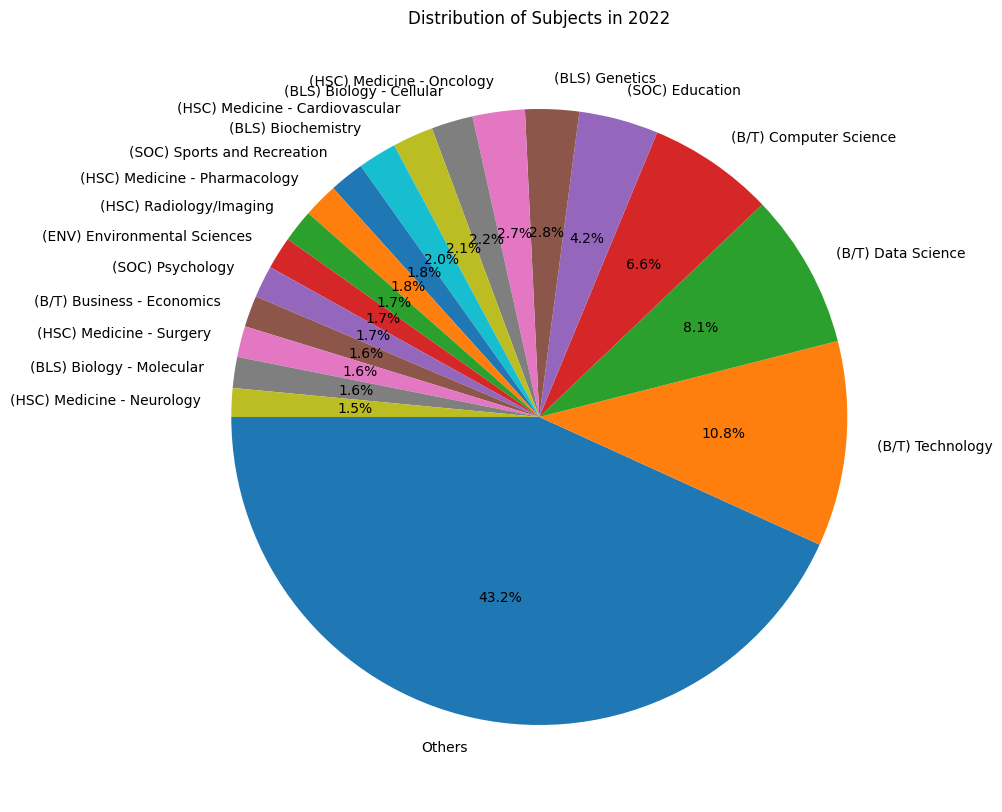

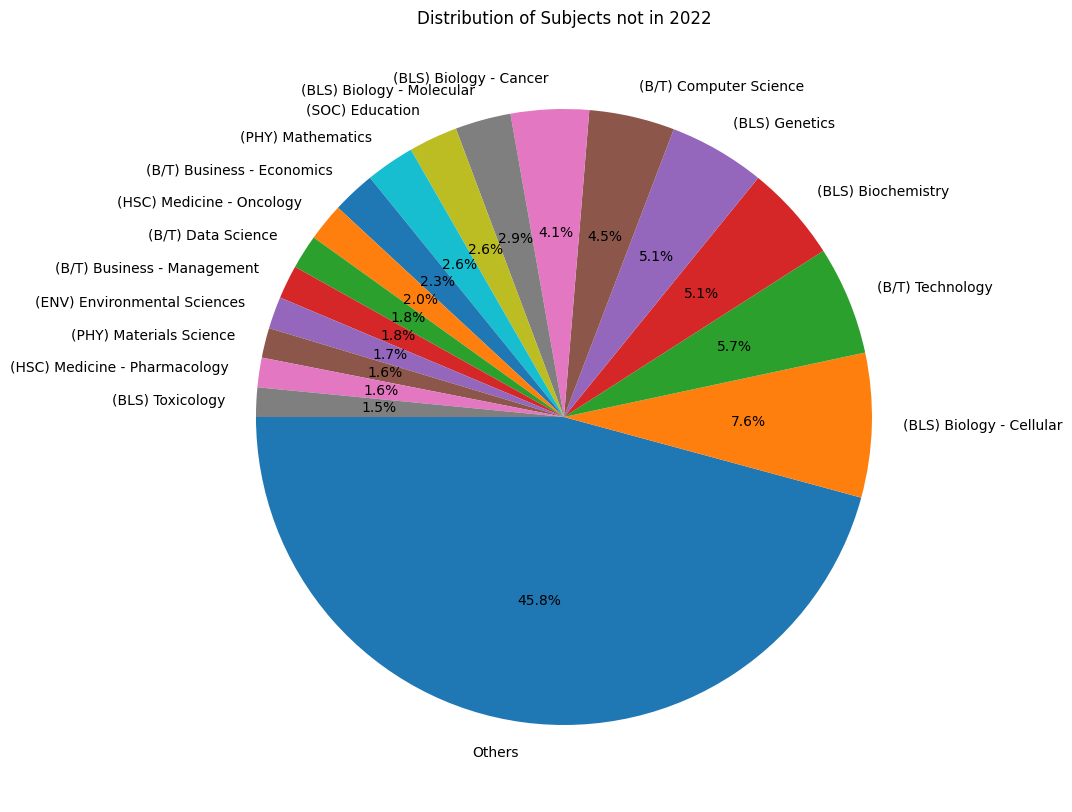

In [13]:
def cut2022(df):
	# Convert 'published' column to datetime
	df["OriginalPaperDate"] = pd.to_datetime(df['OriginalPaperDate'], errors='coerce')

	# Filter rows where year == 2022
	return df[df["OriginalPaperDate"].dt.year == 2022]

def cutNot2022(df):
	# Convert 'published' column to datetime
	df["OriginalPaperDate"] = pd.to_datetime(df['OriginalPaperDate'], errors='coerce')

	# Filter rows where year != 2022
	return df[df["OriginalPaperDate"].dt.year != 2022]

def visualizeSubjects():
	df = get_csv('data/source.csv', 'Record ID', ['Record ID', 'Subject', 'OriginalPaperDate' ])
	df2022 = cut2022(df)
	
	data = get_unique_values(df2022, "Subject")
	data = combine_into_others(data, 1.5, "Subject")
	visualize(data, 'Distribution of Subjects in 2022', 'Subject', 'count')

def visualizeSubjectsNot2022():
	df = get_csv('data/source.csv', 'Record ID', ['Record ID', 'Subject', 'OriginalPaperDate' ])
	df2022 = cutNot2022(df)
	
	data = get_unique_values(df2022, "Subject")
	data = combine_into_others(data, 1.5, "Subject")
	visualize(data, 'Distribution of Subjects not in 2022', 'Subject', 'count')

visualizeSubjects()
visualizeSubjectsNot2022()

Na de subjects heb ik het zelfde gedaan voor de landen en terugtrek redenen zodat ik dit kon analyseren.

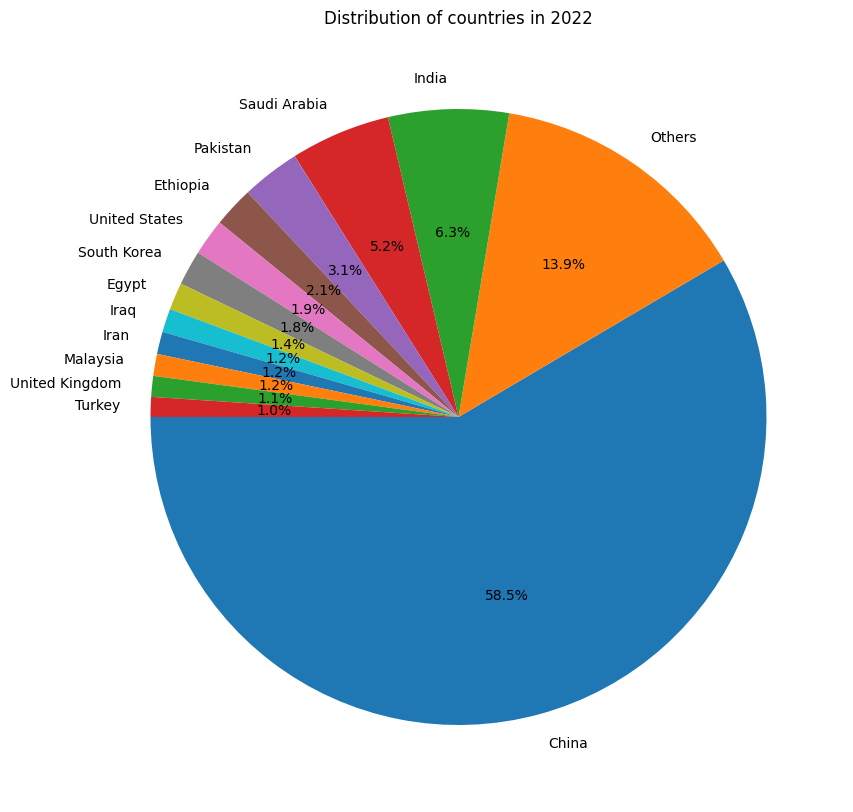

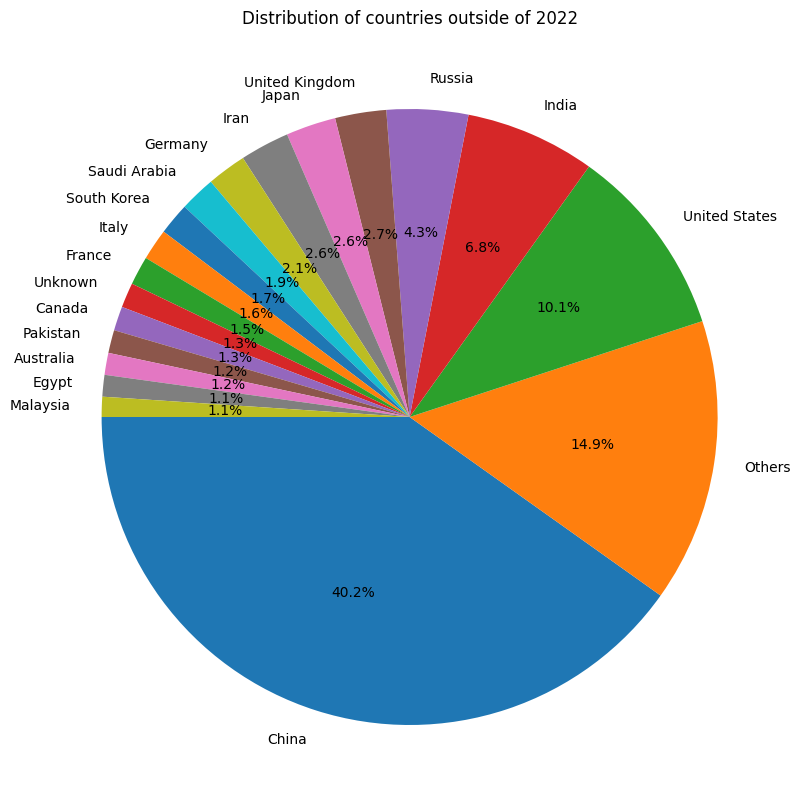

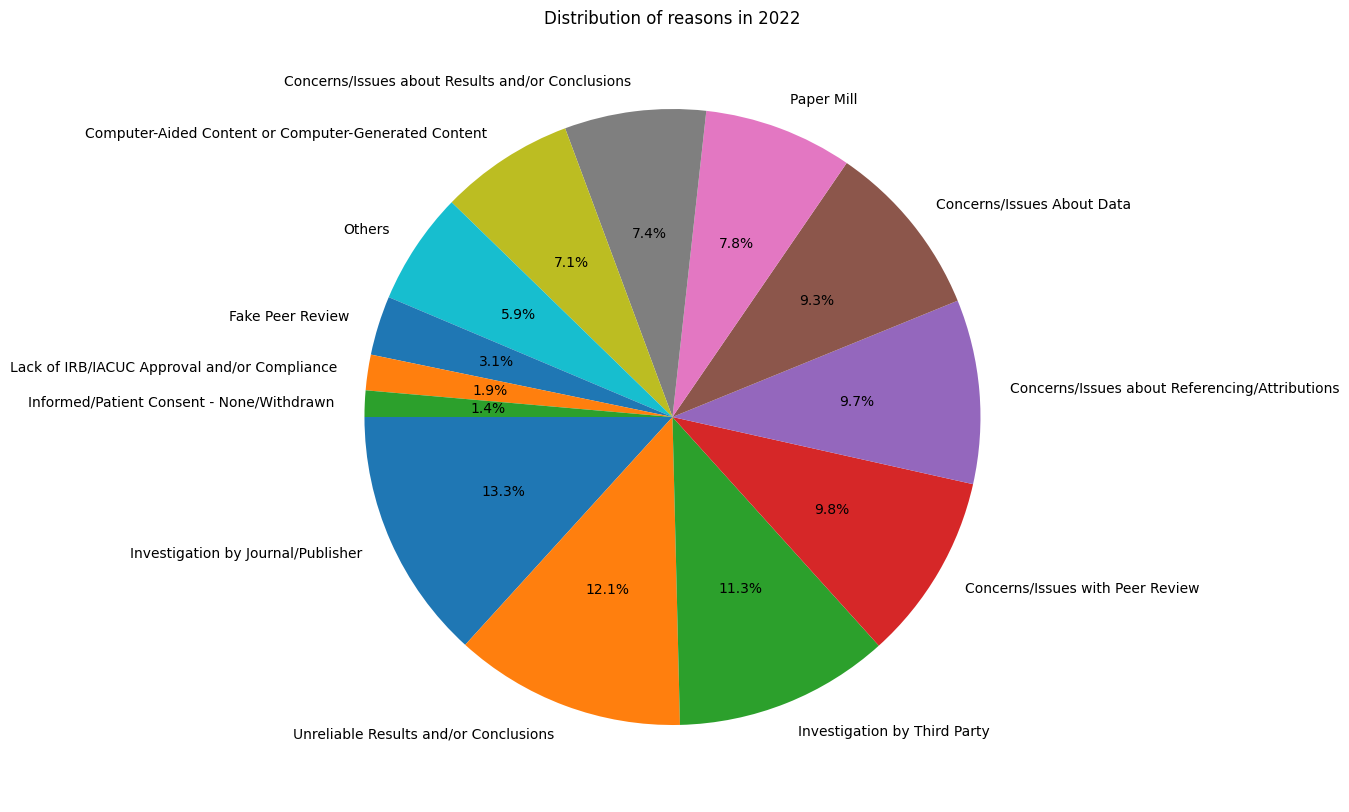

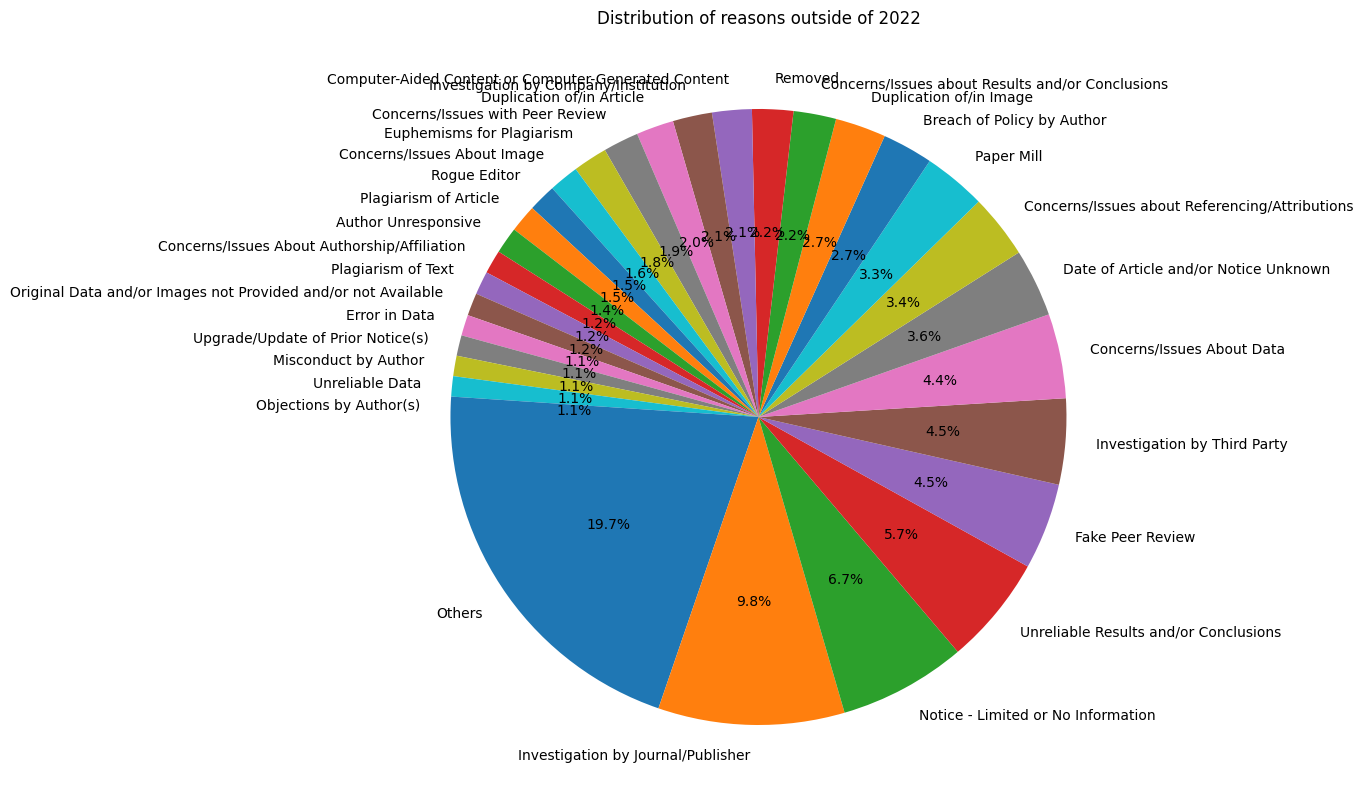

In [14]:
def visualize_countries():
	df = get_csv('data/source.csv', 'Record ID', ['Record ID', 'Country', 'OriginalPaperDate' ])
	df2022 = cut2022(df)
	data = get_unique_values(df2022, "Country")
	
	data = combine_into_others(data, 1, "Country")
	visualize(data, 'Distribution of countries in 2022', 'Country', 'count')

def visualize_countries_Not2022():
	df = get_csv('data/source.csv', 'Record ID', ['Record ID', 'Country', 'OriginalPaperDate' ])
	df2022 = cutNot2022(df)
	data = get_unique_values(df2022, "Country")

	data = combine_into_others(data, 1, "Country")
	visualize(data, 'Distribution of countries outside of 2022', 'Country', 'count')

def visualize_reasons():
	df = get_csv('data/source.csv', 'Record ID', ['Record ID', 'Reason', 'OriginalPaperDate' ])
	df2022 = cut2022(df)
	data = get_unique_values(df2022, 'Reason')

	data = combine_into_others(data, 1, "Reason")
	visualize(data, 'Distribution of reasons in 2022', 'Reason', 'count')

def visualize_reasons_Not2022():
	df = get_csv('data/source.csv', 'Record ID', ['Record ID', 'Reason', 'OriginalPaperDate' ])
	df2022 = cutNot2022(df)
	data = get_unique_values(df2022, 'Reason')

	data = combine_into_others(data, 1, "Reason")
	visualize(data, 'Distribution of reasons outside of 2022', 'Reason', 'count')

visualize_countries()
visualize_countries_Not2022()

visualize_reasons()
visualize_reasons_Not2022()

Echter wou ik na deze diagrammen ook kijken of ik unieke inzichten uit de gegroepeerde onderzoeksvelden kon halen. In de data staat in de colomn subject dit al bij dit heb ik via een functie te zien in data-exploratie uitgesplitst en dan via onderstaande code gevisualiseerd.

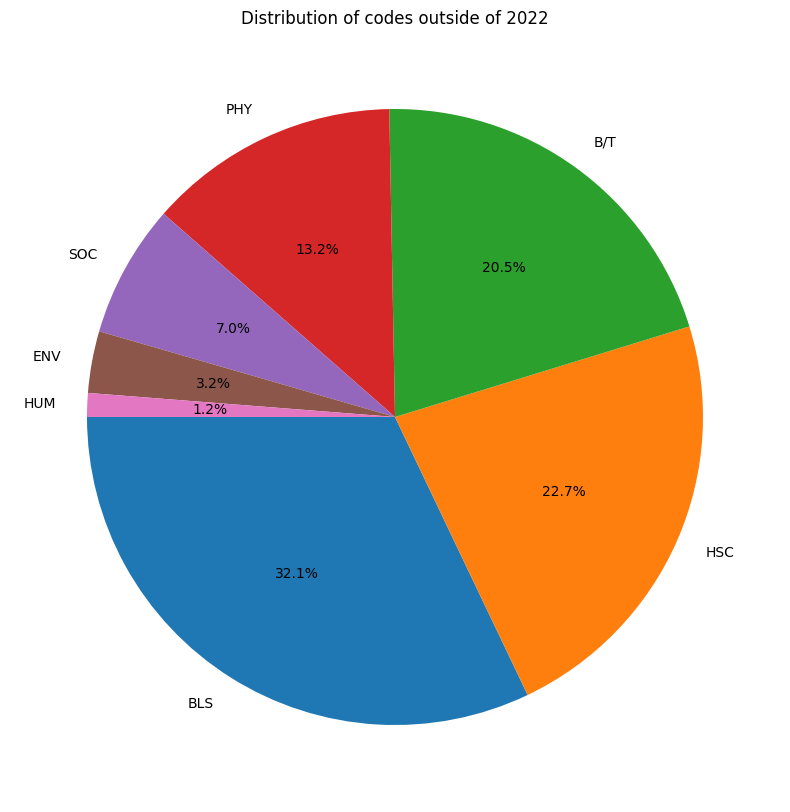

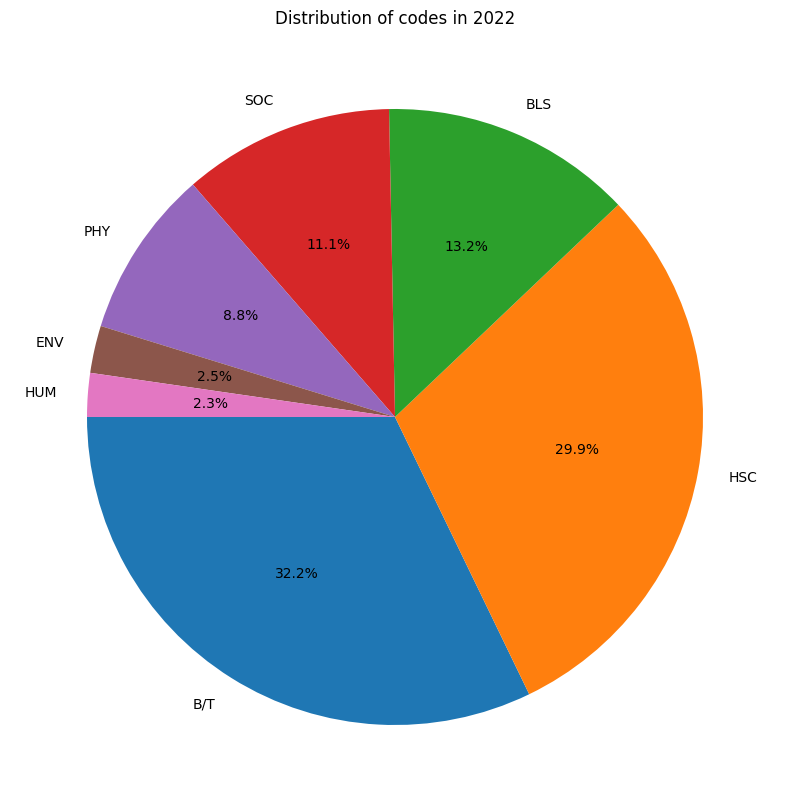

In [15]:
def visualize_codes(in2022, cutPercentage):
	df = get_csv('data/source.csv', 'Record ID', ['Record ID', "Subject", 'OriginalPaperDate' ])
	if in2022:
		df2022 = cutNot2022(df)
		title = f'Distribution of codes outside of 2022'
		path = f"figures/codes-not2022.png"
	else:
		df2022 = cut2022(df)
		title = f'Distribution of codes in 2022'
		path = f"figures/codes-2022.png"
	data = get_unique_codes(df2022, "Subject")

	data = combine_into_others(data, cutPercentage, "code")
	visualize(data, title, "code", 'count', path)

visualize_codes(True, 1)
visualize_codes(False, 1)